In [5]:
# %% [markdown]
# # Анализ комментариев о работе управляющей компании
# 
# ## Цель исследования
# Анализ и классификация положительных комментариев о работе управляющей компании для выявления ключевых аспектов качества обслуживания.
# 
# ## План работы
# 1. Загрузка и первичный анализ данных
# 2. Очистка данных
# 3. Анализ текстовых данных
# 4. Визуализация результатов
# 5. Подготовка данных для классификации

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn')
sns.set_palette('husl')

# Загрузка данных
df = pd.read_csv('project-2.csv')

print("Информация о датасете:")
print(f"Размер датасета: {df.shape}")
print("\nПервые 5 записей:")
print(df.head())

Информация о датасете:
Размер датасета: (2373, 14)

Первые 5 записей:
   annotation_id  annotator                                       comment  \
0              2          1                                       спасибо   
1              3          1                                      спасибо!   
2              4          1                                      Отлично    
3              5          1  Благодарю за оперативное решение проблемы !    
4              6          1         Прекрасный специалист! Побольше таких   

                    created_at       id  lead_time  rating  \
0  2025-05-09T12:52:13.968336Z  2945792     25.543       5   
1  2025-05-09T12:52:22.337636Z  3234340      5.426       5   
2  2025-05-09T12:52:45.298400Z  3380332     11.955       5   
3  2025-05-09T12:54:42.515564Z  3381812     71.119       5   
4  2025-05-09T12:54:48.027164Z  3461991      4.642       5   

                                            taxonomy  \
0  [{"taxonomy":[["Вопрос решен"],["По

/var/folders/v2/5myb5nld7p3773x7t2160vdc0000gn/T/ipykernel_94387/116779572.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
# %% [markdown]
# ## 2. Очистка и анализ данных

# %%
# Проверка на пропущенные значения
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Проверка на дубликаты
duplicates = df.duplicated()
print(f"\nКоличество дубликатов: {duplicates.sum()}")

# Удаление дубликатов
df_cleaned = df.drop_duplicates()
print(f"Размер датасета после удаления дубликатов: {df_cleaned.shape}")
print(f"Удалено записей: {df.shape[0] - df_cleaned.shape[0]}")

# Анализ длины комментариев
df_cleaned['comment_length'] = df_cleaned['comment'].apply(len)
print("\nСтатистика по длине комментариев:")
print(df_cleaned['comment_length'].describe())

# Анализ рейтингов
print("\nРаспределение рейтингов:")
print(df_cleaned['rating'].value_counts())

Количество пропущенных значений в каждом столбце:
annotation_id                              0
annotator                                  0
comment                                    0
created_at                                 0
id                                         0
lead_time                                  0
rating                                     0
taxonomy                                   0
updated_at                                 0
Вопрос решен                            2373
Нравится качество выполнения заявки     2373
Нравится качество работы сотрудников    2373
Нравится скорость отработки заявок      2373
Понравилось выполнение заявки           2373
dtype: int64

Количество дубликатов: 0
Размер датасета после удаления дубликатов: (2373, 14)
Удалено записей: 0

Статистика по длине комментариев:
count    2373.000000
mean       39.265487
std        40.329998
min         2.000000
25%        15.000000
50%        27.000000
75%        49.000000
max       431.000000
Name:

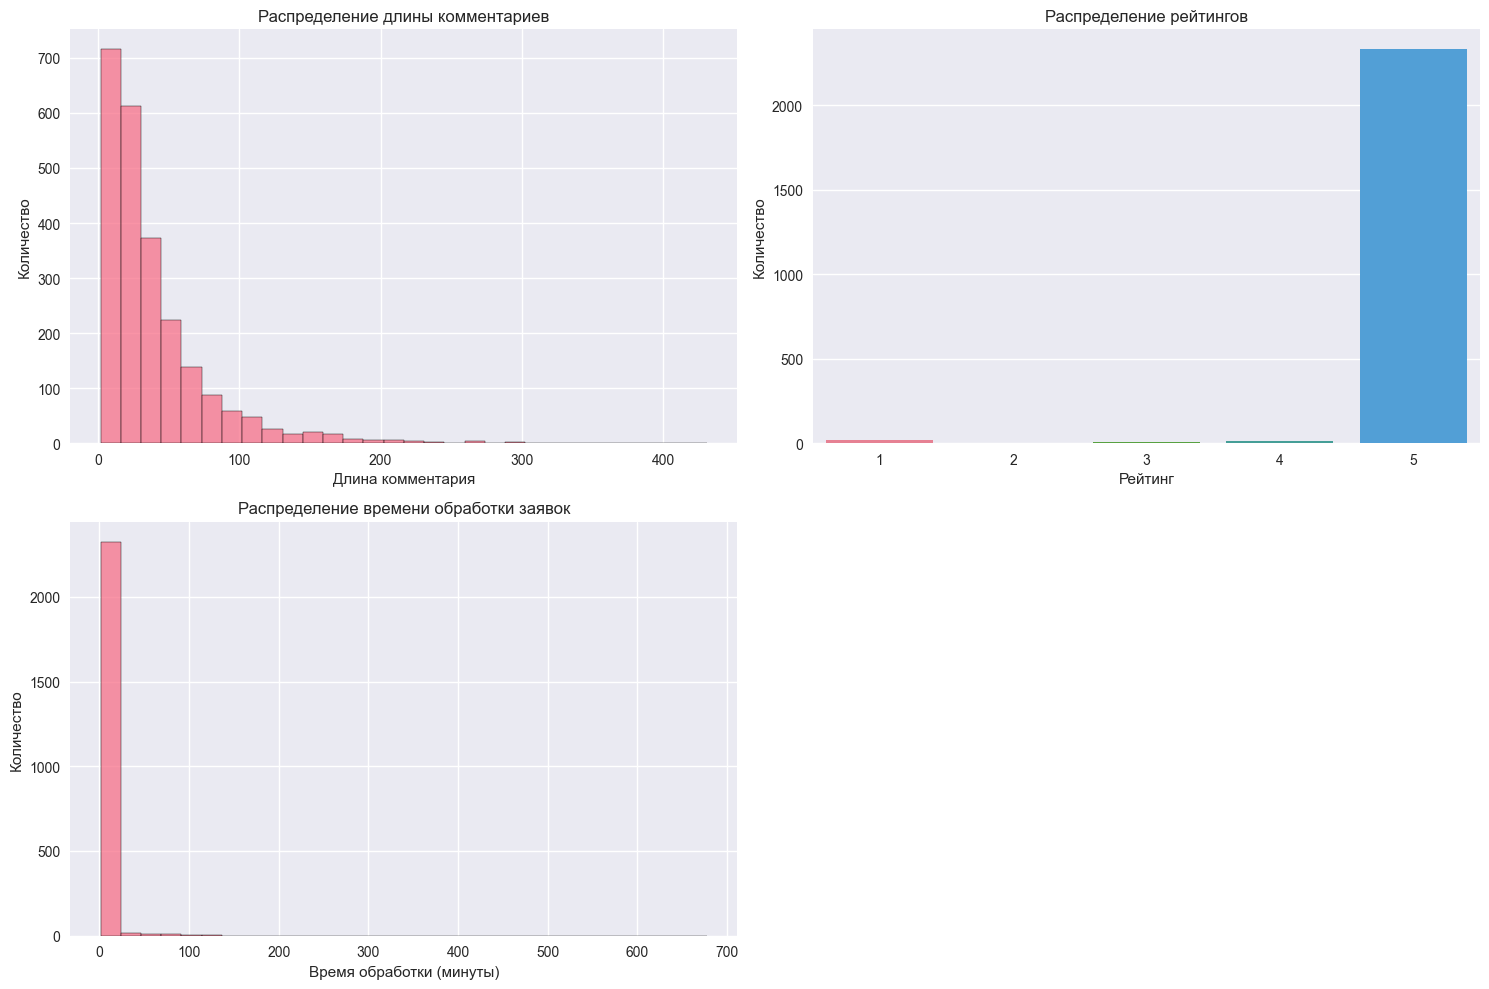

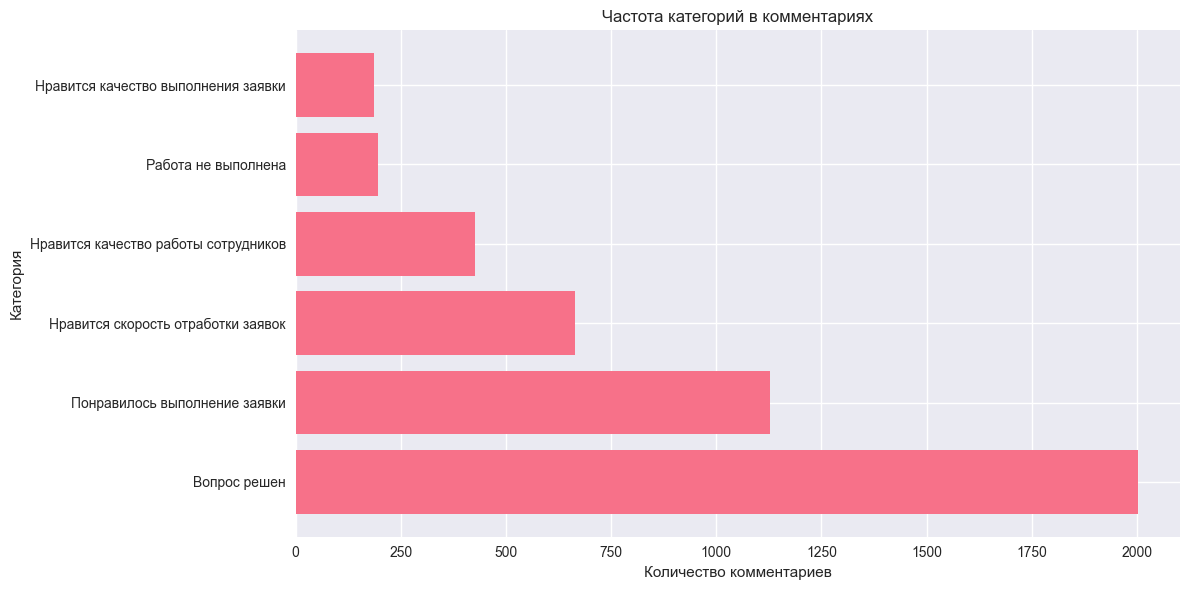


Статистика по категориям:
Вопрос решен: 2002 комментариев
Понравилось выполнение заявки: 1127 комментариев
Нравится скорость отработки заявок: 664 комментариев
Нравится качество работы сотрудников: 426 комментариев
Работа не выполнена: 195 комментариев
Нравится качество выполнения заявки: 187 комментариев


In [8]:
# %% [markdown]
# ## 3. Визуализация данных

# %%
# Создаем фигуру с несколькими графиками
plt.figure(figsize=(15, 10))

# 1. Распределение длины комментариев
plt.subplot(2, 2, 1)
sns.histplot(data=df_cleaned, x='comment_length', bins=30)
plt.title('Распределение длины комментариев')
plt.xlabel('Длина комментария')
plt.ylabel('Количество')

# 2. Распределение рейтингов
plt.subplot(2, 2, 2)
sns.countplot(data=df_cleaned, x='rating')
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')

# 3. Распределение времени обработки заявок
plt.subplot(2, 2, 3)
sns.histplot(data=df_cleaned, x='lead_time', bins=30)
plt.title('Распределение времени обработки заявок')
plt.xlabel('Время обработки (минуты)')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 4. Анализ категорий

# %%
# Функция для извлечения категорий из строки taxonomy
def extract_categories(taxonomy_str):
    try:
        # Извлекаем категории из JSON-подобной строки
        categories = eval(taxonomy_str)[0]['taxonomy']
        return [cat[0] for cat in categories]
    except:
        return []

# Применяем функцию к столбцу taxonomy
df_cleaned['categories'] = df_cleaned['taxonomy'].apply(extract_categories)

# Подсчет частоты категорий
all_categories = [cat for cats in df_cleaned['categories'] for cat in cats]
category_freq = Counter(all_categories)

# Визуализация частоты категорий
plt.figure(figsize=(12, 6))
categories, counts = zip(*category_freq.most_common())
plt.barh(categories, counts)
plt.title('Частота категорий в комментариях')
plt.xlabel('Количество комментариев')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

# Вывод статистики по категориям
print("\nСтатистика по категориям:")
for category, count in category_freq.most_common():
    print(f"{category}: {count} комментариев")

In [11]:
# Проверка дубликатов только по тексту комментария
duplicates_by_comment = df.duplicated(subset=['comment'])
print(f"Дубликатов по полю 'comment': {duplicates_by_comment.sum()}")

Дубликатов по полю 'comment': 561


In [12]:
# Удаляем дубликаты только по тексту комментария
df_unique_comments = df.drop_duplicates(subset=['comment'])
print(f"Размер датасета после удаления дубликатов по 'comment': {df_unique_comments.shape}")
print(f"Удалено записей: {df.shape[0] - df_unique_comments.shape[0]}")

# Сохраняем результат
df_unique_comments.to_csv('project-2-unique-comments.csv', index=False)
print("Данные без повторяющихся комментариев сохранены в файл 'project-2-unique-comments.csv'")

Размер датасета после удаления дубликатов по 'comment': (1812, 14)
Удалено записей: 561
Данные без повторяющихся комментариев сохранены в файл 'project-2-unique-comments.csv'


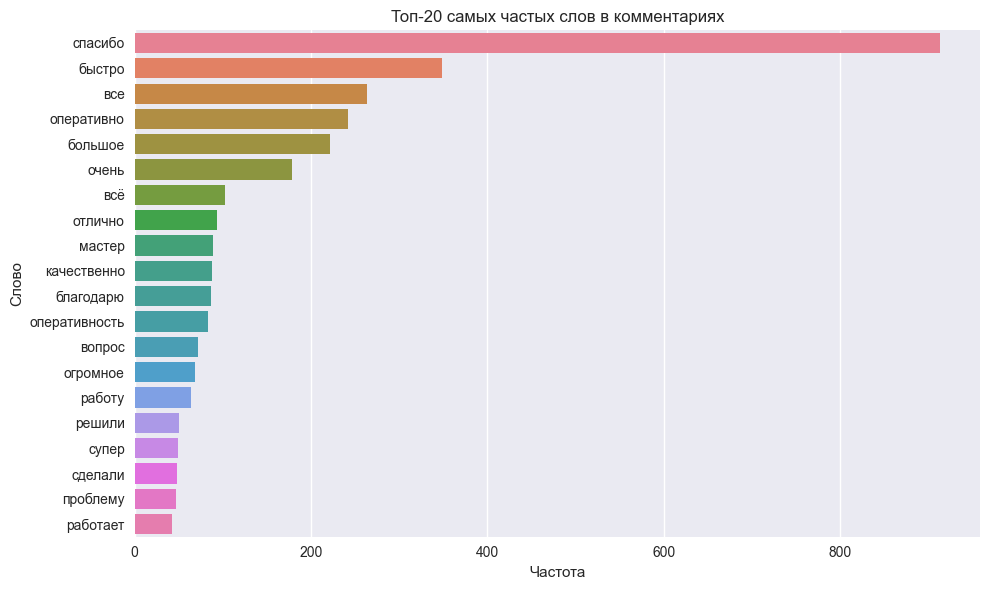

Топ-20 самых частых слов:
спасибо: 913
быстро: 349
все: 264
оперативно: 242
большое: 222
очень: 178
всё: 103
отлично: 93
мастер: 89
качественно: 88
благодарю: 87
оперативность: 83
вопрос: 72
огромное: 69
работу: 64
решили: 50
супер: 49
сделали: 48
проблему: 47
работает: 42


In [13]:
# %% [markdown]
# ## Частотный анализ слов в комментариях

# %%
from collections import Counter
import re

# Объединяем все комментарии в одну строку
all_text = ' '.join(df_unique_comments['comment'].astype(str)).lower()

# Удаляем знаки препинания и разбиваем на слова
words = re.findall(r'\b\w+\b', all_text)

# Можно добавить список стоп-слов (например, самые частые служебные слова)
stopwords_ru = set([
    'и', 'в', 'на', 'по', 'за', 'с', 'что', 'как', 'а', 'но', 'не', 'я', 'у', 'от', 'до', 'для', 'то', 'это', 'вы', 'мы', 'он', 'она', 'они', 'бы', 'к', 'о', 'же', 'так', 'его', 'ее', 'их', 'из', 'ли', 'или', 'были', 'был', 'была', 'было', 'быть', 'есть', 'нет', 'да', 'при', 'со', 'об', 'под', 'над', 'же', 'ещё', 'уже'
])

# Убираем стоп-слова
filtered_words = [word for word in words if word not in stopwords_ru and len(word) > 2]

# Считаем частоту
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)

# Визуализация
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='husl')
plt.title('Топ-20 самых частых слов в комментариях')
plt.xlabel('Частота')
plt.ylabel('Слово')
plt.tight_layout()
plt.show()

print("Топ-20 самых частых слов:")
for word, count in most_common_words:
    print(f"{word}: {count}")

In [14]:
# %% [markdown]
# ## Поиск аномалий и выбросов

# %%
# 1. Очень долгие заявки (выбросы по времени обработки)
threshold = df_unique_comments['lead_time'].quantile(0.99)  # 99-й перцентиль
long_lead = df_unique_comments[df_unique_comments['lead_time'] > threshold]

print(f"Количество заявок с аномально долгим временем обработки (>{threshold:.2f} минут): {long_lead.shape[0]}")
print(long_lead[['comment', 'lead_time', 'created_at']].head())

# 2. Комментарии с низким рейтингом
low_rating = df_unique_comments[df_unique_comments['rating'] < 4]
print(f"\nКоличество комментариев с низким рейтингом (<4): {low_rating.shape[0]}")
print(low_rating[['comment', 'rating', 'created_at']].head())

Количество заявок с аномально долгим временем обработки (>59.67 минут): 19
                                               comment  lead_time  \
3         Благодарю за оперативное решение проблемы !      71.119   
22                    спасибо. все прошло очень хорошо    158.145   
61                                             Быстро     121.817   
98       Умело подкрутили редукторы давления. Молодец!     71.238   
167  Очень вежливый и профессиональный мастер. Устр...     84.293   

                      created_at  
3    2025-05-09T12:54:42.515564Z  
22   2025-05-09T13:00:03.725941Z  
61   2025-05-09T13:08:54.800334Z  
98   2025-05-09T13:17:15.527315Z  
167  2025-05-09T13:37:58.033562Z  

Количество комментариев с низким рейтингом (<4): 21
                                    comment  rating  \
6                 пересчет, и скорость \r\n       1   
21                                     Норм       1   
49  спасибо за  быстрый ответ! \r\n\r\n\r\n       1   
54                         